In [1]:
# importing the usual suspects

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in the data

epl=pd.read_csv('Premier_League.csv')

In [3]:
# making sure we view all the columns; no truncation

pd.set_option('display.max_columns',None)

# Data inspection & cleaning

In [4]:
# checking out the first 5 rows

epl.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,home_pass,away_pass,home_chances,away_chances,home_corners,away_corners,home_offside,away_offside,home_tackles,away_tackles,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,"60,095",Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,14,6,8,0,4,4,2,2,89.0,88.0,3,0,8,4,1,0,82.4,44.4,47.8,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,"42,212",Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,12,8,5,4,5,3,2,1,75.3,83.6,4,3,4,3,0,6,42.9,15.4,52.2,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,"17,120",Brentford,1,Manchester City,0,34.4,65.6,11,17,4,3,4,6,3,8,79.3,89.8,2,1,3,4,3,0,64.7,35.7,50.0,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,"40,130",Chelsea,1,Newcastle United,1,64.4,35.6,22,13,5,4,9,5,8,4,88.9,83.3,2,2,10,3,2,1,42.9,42.9,54.5,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,"25,198",Crystal Palace,1,Nottingham Forest,1,66.0,34.0,15,7,3,4,8,2,4,1,85.7,69.9,1,0,5,4,2,2,40.0,52.6,58.3,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


In [5]:
# the columns

epl.columns

Index(['date', 'clock', 'stadium', 'attendance', 'Home Team', 'Goals Home',
       'Away Team', 'Away Goals', 'home_possessions', 'away_possessions',
       'home_shots', 'away_shots', 'home_on', 'away_on', 'home_off',
       'away_off', 'home_blocked', 'away_blocked', 'home_pass', 'away_pass',
       'home_chances', 'away_chances', 'home_corners', 'away_corners',
       'home_offside', 'away_offside', 'home_tackles', 'away_tackles',
       'home_duels', 'away_duels', 'home_saves', 'away_saves', 'home_fouls',
       'away_fouls', 'home_yellow', 'away_yellow', 'home_red', 'away_red',
       'links'],
      dtype='object')

The naming of our columns is inconsistent. Some names are in mixed case, others follow snake casing. We need to clean that up.

In [6]:
# making everything lowercase 
# replacing the whitespace between some column names with an underscore

epl.columns=epl.columns.str.lower().str.replace(' ','_')

In [7]:
# clean column names

epl.columns

Index(['date', 'clock', 'stadium', 'attendance', 'home_team', 'goals_home',
       'away_team', 'away_goals', 'home_possessions', 'away_possessions',
       'home_shots', 'away_shots', 'home_on', 'away_on', 'home_off',
       'away_off', 'home_blocked', 'away_blocked', 'home_pass', 'away_pass',
       'home_chances', 'away_chances', 'home_corners', 'away_corners',
       'home_offside', 'away_offside', 'home_tackles', 'away_tackles',
       'home_duels', 'away_duels', 'home_saves', 'away_saves', 'home_fouls',
       'away_fouls', 'home_yellow', 'away_yellow', 'home_red', 'away_red',
       'links'],
      dtype='object')

In [8]:
# checking for nulls
# investigating the data types

epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              380 non-null    object 
 1   clock             380 non-null    object 
 2   stadium           380 non-null    object 
 3   attendance        380 non-null    object 
 4   home_team         380 non-null    object 
 5   goals_home        380 non-null    int64  
 6   away_team         380 non-null    object 
 7   away_goals        380 non-null    int64  
 8   home_possessions  380 non-null    float64
 9   away_possessions  380 non-null    float64
 10  home_shots        380 non-null    int64  
 11  away_shots        380 non-null    int64  
 12  home_on           380 non-null    int64  
 13  away_on           380 non-null    int64  
 14  home_off          380 non-null    int64  
 15  away_off          380 non-null    int64  
 16  home_blocked      380 non-null    int64  
 1

The `date` column is formatted as a `string`. We'll convert is to `datetime`.

The `attendance` column has a string data type. We'll change that to `integer`

In [9]:
# date column from object to datetime

epl['date']=pd.to_datetime(epl['date'])

Alternatively, I could have used `parse_dates=[0]` when reading in the data. As in, `epl=pd.read_csv('Premier_League.csv', parse_dates=[0])`

In [10]:
# cleaning out the commas to enable conversion to integers

epl['attendance']=epl['attendance'].str.replace(',','')

In [11]:
# cleaned attendance

epl['attendance'].sample(5)

185    53126
357    21798
323      Nan
82     30769
111    41021
Name: attendance, dtype: object

In [12]:
# the actual conversion

epl['attendance']=epl['attendance'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Nan'

We encountered this error while doing the conversion as some of the attendance figures are entered as `Nan` and are therefore not digits. Let's take a closer look.

In [13]:
epl[epl['attendance']=='Nan']

,date,clock,stadium,attendance,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,home_pass,away_pass,home_chances,away_chances,home_corners,away_corners,home_offside,away_offside,home_tackles,away_tackles,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
72,2023-04-22,3:00pm,Nan,Nan,Liverpool,3,Nottingham Forest,2,81.1,18.9,18,11,6,5,7,5,5,1,87.7,52.7,5,1,9,3,2,3,57.1,73.3,57.6,42.4,3,2,9,12,0,1,0,0,https://www.skysports.com/football/liverpool-v...
210,2023-01-03,7:45pm,Nan,Nan,Everton,1,Brighton and Hove Albion,4,48.9,51.1,10,19,4,8,5,6,1,5,87.7,85.4,0,2,5,2,1,0,62.5,66.7,23.5,76.5,4,3,8,10,3,1,0,0,https://www.skysports.com/football/everton-vs-...
323,2022-09-03,3:00pm,Nan,Nan,Brentford,5,Leeds United,2,31.1,68.9,14,17,8,6,5,7,1,4,64.7,82.4,3,3,2,6,1,1,70.8,70.8,60.7,39.3,4,3,8,9,2,2,0,0,https://www.skysports.com/football/brentford-v...
338,2022-08-30,7:45pm,Nan,Nan,Southampton,2,Chelsea,1,32.2,67.8,9,10,7,4,0,2,2,4,61.0,82.0,3,1,5,3,0,3,68.4,50.0,44.8,55.2,3,3,15,10,2,1,0,0,https://www.skysports.com/football/southampton...
350,2022-08-22,8:00pm,Nan,Nan,Manchester United,2,Liverpool,1,29.5,70.5,13,17,5,5,4,7,4,5,65.9,83.7,4,1,6,8,2,2,70.8,84.6,41.2,58.8,5,3,11,7,3,1,0,0,https://www.skysports.com/football/manchester-...


Recall when we first inspected our dataset, we did not find any null values. But on closer inspection, we find that some entries are filled in but are technically missing.

A Google search will return the actual attendance figures for these 'missing' values so there's no need to fill them in with aggregated data from the rest of the dataset.

We'll fill in the 'missing' stadium data manually as we actually know it by heart.

In [14]:
# filling in the 'missing' data

index=[72,210,323,338,350]

# lists with the entries we want to fill in

attendance=[53325,39103,16946,31542,73594]
stadium=['Anfield','Goodison Park','Gtech Community Stadium',"St. Mary's Stadium",'Old Trafford']

# looping through the lists

for ind, att, stad in zip(index, attendance, stadium):
    epl.at[ind,'attendance']=att
    epl.at[ind,'stadium']=stad

In [15]:
# checking whether the steps we took above worked

epl[(epl['stadium']=='Nan') & (epl['attendance']=='Nan')]

,date,clock,stadium,attendance,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,home_pass,away_pass,home_chances,away_chances,home_corners,away_corners,home_offside,away_offside,home_tackles,away_tackles,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links


An empty dataframe was returned meaning we were successful.

In [16]:
# to be absolutely certain

epl.iloc[338][['stadium', 'attendance']]

stadium       St. Mary's Stadium
attendance                 31542
Name: 338, dtype: object

It worked! We have no `Nan' values in our data.

In [17]:
# completing the conversion

epl['attendance']=epl['attendance'].astype('int64')

In [18]:
# confirming that the conversion worked

epl['attendance'].dtype

dtype('int64')

In [19]:
epl.head()

,date,clock,stadium,attendance,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,home_pass,away_pass,home_chances,away_chances,home_corners,away_corners,home_offside,away_offside,home_tackles,away_tackles,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,2023-05-28,4:30pm,Emirates Stadium,60095,Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,14,6,8,0,4,4,2,2,89.0,88.0,3,0,8,4,1,0,82.4,44.4,47.8,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,2023-05-28,4:30pm,Villa Park,42212,Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,12,8,5,4,5,3,2,1,75.3,83.6,4,3,4,3,0,6,42.9,15.4,52.2,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,2023-05-28,4:30pm,Gtech Community Stadium,17120,Brentford,1,Manchester City,0,34.4,65.6,11,17,4,3,4,6,3,8,79.3,89.8,2,1,3,4,3,0,64.7,35.7,50.0,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,2023-05-28,4:30pm,Stamford Bridge,40130,Chelsea,1,Newcastle United,1,64.4,35.6,22,13,5,4,9,5,8,4,88.9,83.3,2,2,10,3,2,1,42.9,42.9,54.5,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,2023-05-28,4:30pm,Selhurst Park,25198,Crystal Palace,1,Nottingham Forest,1,66.0,34.0,15,7,3,4,8,2,4,1,85.7,69.9,1,0,5,4,2,2,40.0,52.6,58.3,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


We won't need the `links` column. It needs to go.

In [20]:
# dropping 'links'

epl=epl.drop('links', axis=1)

In [21]:
epl.tail()

,date,clock,stadium,attendance,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,home_pass,away_pass,home_chances,away_chances,home_corners,away_corners,home_offside,away_offside,home_tackles,away_tackles,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red
375,2022-08-06,3:00pm,Elland Road,36347,Leeds United,2,Wolverhampton Wanderers,1,40.1,59.9,12,15,4,6,5,6,3,3,75.8,84.8,2,1,6,4,0,1,66.7,68.8,56.3,43.8,5,3,13,9,2,0,0,0
376,2022-08-06,3:00pm,"St James' Park, Newcastle",52245,Newcastle United,2,Nottingham Forest,0,61.4,38.6,23,5,10,0,8,3,5,2,80.8,70.4,2,0,11,1,2,0,68.4,73.3,42.9,57.1,0,7,9,14,0,3,0,0
377,2022-08-06,3:00pm,Tottenham Hotspur Stadium,61732,Tottenham Hotspur,4,Southampton,1,57.5,42.5,18,10,8,2,6,5,4,3,85.0,82.2,1,0,10,2,2,0,62.5,42.9,54.2,45.8,1,5,11,6,3,0,0,0
378,2022-08-06,5:30pm,Goodison Park,39254,Everton,0,Chelsea,1,37.3,62.7,8,15,4,6,3,3,1,6,73.4,86.6,0,1,4,16,0,2,70.8,47.4,35.3,64.7,5,3,14,11,3,2,0,0
379,2022-08-05,8:00pm,Selhurst Park,25286,Crystal Palace,0,Arsenal,2,56.3,43.7,10,10,2,2,2,4,6,4,86.7,82.2,2,1,3,5,1,2,50.0,55.2,41.7,58.3,1,2,16,11,1,2,0,0


# Data wrangling & analysis

## Attendance

**Total attendance**

In [22]:
# how many people attended the matches?

np.sum(epl['attendance'])

15289063

**Average attendance**

In [23]:
# what was the mean attendance per match?

round(np.sum(epl['attendance'])/len(epl),2)

40234.38

**Highest attendance**

In [24]:
# which match drew the biggest crowd?

epl.sort_values('attendance')[-1:][['stadium','attendance','home_team','goals_home','away_team','away_goals']]

,stadium,attendance,home_team,goals_home,away_team,away_goals
196,Old Trafford,75546,Manchester United,2,Manchester City,1


The 189th Manchester derby was one of the most anticipated games of the season so the fact that it drew the largest crowd comes as no surprise.

**Lowest attendance**

In [25]:
epl.sort_values('attendance')[:1][['stadium','attendance','home_team','goals_home','away_team','away_goals']]

,stadium,attendance,home_team,goals_home,away_team,away_goals
217,Vitality Stadium,9972,Bournemouth,0,Crystal Palace,2


Don't lose sight of the fact that match attendance is a function of stadium capacity, among other things.

**Mean attendance per kickoff time**

In [26]:
# what was the most popular kickoff time?

epl['clock'].value_counts()

3:00pm    137
2:00pm     49
8:00pm     49
4:30pm     35
5:30pm     32
12:30p     27
7:45pm     19
7:30pm     18
8:15pm      5
1:30pm      2
7:00pm      2
12:00p      2
2:15pm      1
4:15pm      1
4:00pm      1
Name: clock, dtype: int64

It is a well known fact that most premier league fixtures in a particular matchweek are played on a Saturday afternoon.

In [27]:
epl.groupby('clock').mean()['attendance']

clock
12:00p    28632.000000
12:30p    42137.481481
1:30pm    62045.500000
2:00pm    43546.653061
2:15pm    39298.000000
3:00pm    35855.350365
4:00pm    53490.000000
4:15pm    73682.000000
4:30pm    48135.000000
5:30pm    36686.562500
7:00pm    50867.500000
7:30pm    34578.166667
7:45pm    41527.526316
8:00pm    44291.938776
8:15pm    43078.400000
Name: attendance, dtype: float64

<AxesSubplot:ylabel='clock'>

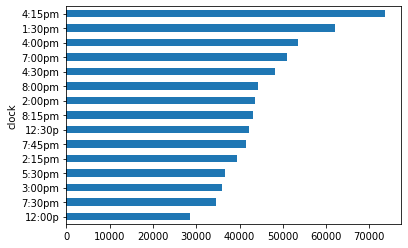

In [28]:
epl.groupby('clock').mean()['attendance'].sort_values().plot(kind='barh')

<AxesSubplot:xlabel='clock', ylabel='attendance'>

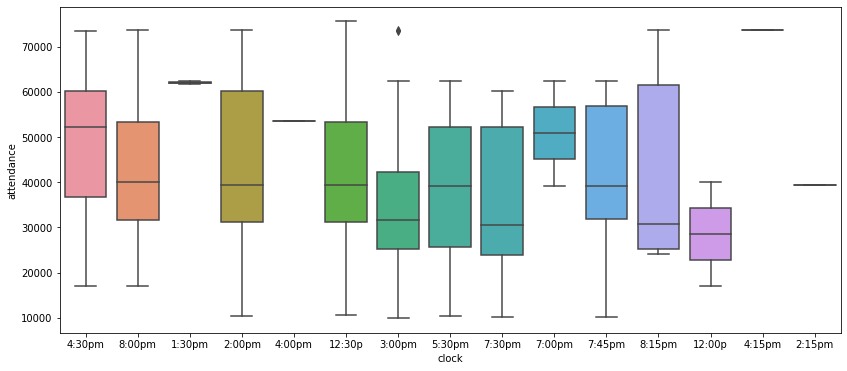

In [29]:
plt.figure(figsize=(14,6))
sns.boxplot(data=epl, x='clock', y='attendance')

## Goals

In [30]:
# creating a new 'total_goals' column by summing 'goals_home' and 'away_goals'

epl['total_goals']=epl['goals_home']+epl['away_goals']

**Total goals**

In [31]:
# how many goals were scored in the entire season?

np.sum(epl['total_goals'])

1084

**Goals per game**

In [32]:
# goals scored per match

round(np.sum(epl['total_goals'])/len(epl),2)

2.85

**Home goals**

In [33]:
# how many goals were scored by the home team?

np.sum(epl['goals_home'])

621

**Away goals**

In [34]:
# total goals scored by the away team

np.sum(epl['away_goals'])

463

**Most goals in a single game**

In [35]:
# what was the highest number of goals scored in a single match?

epl['total_goals'].max()

9

**Highest scoring matches**

In [36]:
# the highest scoring matches

epl[epl['total_goals']==9][['home_team', 'goals_home','away_team', 'away_goals']]

,home_team,goals_home,away_team,away_goals
304,Manchester City,6,Manchester United,3
347,Liverpool,9,Bournemouth,0


**Biggest margin of victory**

In [37]:
epl['goal_difference']=epl['goals_home']-epl['away_goals']

In [38]:
# what was the biggest margin of victory?

abs(epl['goal_difference']).max()

9

In [39]:
# which fixture saw the winning team outscore the loser by a whooping 9 goals?

epl.iloc[epl['goal_difference'].idxmax()][['date', 'clock','home_team', 'goals_home','away_team', 'away_goals']]

date          2022-08-27 00:00:00
clock                      3:00pm
home_team               Liverpool
goals_home                      9
away_team             Bournemouth
away_goals                      0
Name: 347, dtype: object

Bournemouth were absolutely mauled at Anfield.

**Biggest home wins**

In [40]:
# 5 biggest home wins

epl.sort_values('goal_difference', ascending=False).head()[['home_team', 'goals_home','away_team', 'away_goals']]

,home_team,goals_home,away_team,away_goals
347,Liverpool,9,Bournemouth,0
131,Liverpool,7,Manchester United,0
55,Brighton and Hove Albion,6,Wolverhampton Wanderers,0
333,Manchester City,6,Nottingham Forest,0
0,Arsenal,5,Wolverhampton Wanderers,0


Liverpool recorded the biggest home wins of the season, putting 9 and 7 unanswered goals past Bournemouth and Manchester United respectively.

**Biggest away wins**

In [41]:
# top 5 wins by an away team

epl.sort_values('goal_difference').head()[['home_team', 'goals_home','away_team', 'away_goals']]

,home_team,goals_home,away_team,away_goals
74,Leeds United,1,Liverpool,6
84,Leeds United,1,Crystal Palace,5
268,Wolverhampton Wanderers,0,Leicester City,4
208,Crystal Palace,0,Tottenham Hotspur,4
95,West Ham United,1,Newcastle United,5


Leeds received the two heaviest home defeats of the season.

Liverpool recorded both the biggest home win and biggest away win of the season. Relentless.

**Highest scoring draw**

In [42]:
# which tied game had the most goals?

epl[(epl['goals_home']==epl['away_goals']) & (epl['total_goals']>6)][['stadium',
                                                            'attendance','home_team','goals_home','away_team','away_goals']]

,stadium,attendance,home_team,goals_home,away_team,away_goals
9,St. Mary's Stadium,31129,Southampton,4,Liverpool,4


**Barren draws**

In [43]:
# how many nil-nil draws were played out?

len(epl[(epl['goals_home']==epl['away_goals']) & (epl['total_goals']==0)])

23

**Average goals per kickoff time**

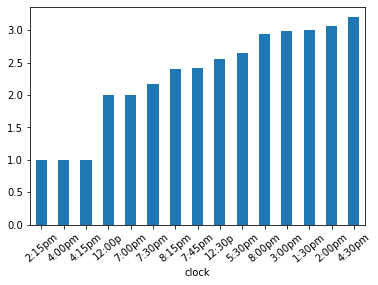

In [44]:
epl.groupby('clock').mean()['total_goals'].sort_values().plot(kind='bar')
plt.xticks(rotation=40);

## Team Stats

In [45]:
# new dataframe where every single club played at home

home_stats=epl.groupby('home_team').sum().reset_index().sort_values('goals_home', 
                                                                    ascending=False)[['home_team','goals_home', 
                                                                                      'home_shots','home_yellow','home_red']]

In [46]:
home_stats.head()

,home_team,goals_home,home_shots,home_yellow,home_red
12,Manchester City,60,317,19,1
0,Arsenal,53,354,17,0
11,Liverpool,46,328,28,1
4,Brighton and Hove Albion,37,351,32,0
17,Tottenham Hotspur,37,289,41,1


In [47]:
# new dataframe where every single club played away from home

away_stats=epl.groupby('away_team').sum().reset_index().sort_values('away_goals', 
                                                                    ascending=False)[['away_team','away_goals', 
                                                                                      'away_shots','away_yellow','away_red']]

In [48]:
away_stats.head()

,away_team,away_goals,away_shots,away_yellow,away_red
0,Arsenal,35,239,35,0
4,Brighton and Hove Albion,35,262,27,0
12,Manchester City,34,283,25,0
17,Tottenham Hotspur,33,229,34,2
14,Newcastle United,32,228,31,0


In [49]:
# merging the two new dataframes

home_away=home_stats.merge(away_stats, how='inner', left_on='home_team', right_on='away_team')

In [50]:
home_away.head()

,home_team,goals_home,home_shots,home_yellow,home_red,away_team,away_goals,away_shots,away_yellow,away_red
0,Manchester City,60,317,19,1,Manchester City,34,283,25,0
1,Arsenal,53,354,17,0,Arsenal,35,239,35,0
2,Liverpool,46,328,28,1,Liverpool,29,277,29,0
3,Brighton and Hove Albion,37,351,32,0,Brighton and Hove Albion,35,262,27,0
4,Tottenham Hotspur,37,289,41,1,Tottenham Hotspur,33,229,34,2


In [51]:
home_away['total_goals'] = home_away['goals_home'] + home_away['away_goals']
home_away['total_shots'] = home_away['home_shots'] + home_away['away_shots']
home_away['total_yellows'] = home_away['home_yellow'] + home_away['away_yellow']
home_away['total_reds'] = home_away['home_red'] + home_away['away_red']
home_away['total_bookings'] = home_away['total_yellows'] + home_away['total_reds']

home_away.head()

,home_team,goals_home,home_shots,home_yellow,home_red,away_team,away_goals,away_shots,away_yellow,away_red,total_goals,total_shots,total_yellows,total_reds,total_bookings
0,Manchester City,60,317,19,1,Manchester City,34,283,25,0,94,600,44,1,45
1,Arsenal,53,354,17,0,Arsenal,35,239,35,0,88,593,52,0,52
2,Liverpool,46,328,28,1,Liverpool,29,277,29,0,75,605,57,1,58
3,Brighton and Hove Albion,37,351,32,0,Brighton and Hove Albion,35,262,27,0,72,613,59,0,59
4,Tottenham Hotspur,37,289,41,1,Tottenham Hotspur,33,229,34,2,70,518,75,3,78


**Highest scorers**

In [52]:
# who were the highest scorers?

home_away.sort_values('total_goals', ascending=False).head()[['home_team','total_goals','total_shots']]

,home_team,total_goals,total_shots
0,Manchester City,94,600
1,Arsenal,88,593
2,Liverpool,75,605
3,Brighton and Hove Albion,72,613
4,Tottenham Hotspur,70,518


The champions Manchester City both scored the most goals and took the most shots.

Of the 5 most prolific scorers, only Tottenham Hotspur missed out on European qualification.

**Lowest scorers**

In [53]:
# who scored the fewest goals?

home_away.sort_values('total_goals').head()[['home_team','total_goals','total_shots']]

,home_team,total_goals,total_shots
18,Wolverhampton Wanderers,31,412
19,Everton,34,429
17,Southampton,36,417
16,Bournemouth,37,358
15,Chelsea,38,484


Wolves scored the fewest goals.

Chelsea had an indifferent season, taking into account their usually high standards. Not surprised to see them fifth from bottom for goals scored.

Of the 5 clubs with the fewest goals scored, only Southampton got relegated and all 5 finished 12th and below.

**Conversion rates**

In [54]:
home_away['conversion_rate']=np.round(home_away['total_goals']/home_away['total_shots'],2)

**Best conversion rates**

In [55]:
# who had the best conversion rate and what was it?

home_away[['home_team','total_goals','total_shots','conversion_rate']].nlargest(5,'conversion_rate')

,home_team,total_goals,total_shots,conversion_rate
0,Manchester City,94,600,0.16
1,Arsenal,88,593,0.15
4,Tottenham Hotspur,70,518,0.14
7,Brentford,58,408,0.14
9,Fulham,55,429,0.13


**Worst conversion rates**

In [56]:
# which teams had the poorest conversion rates?

home_away[['home_team','total_goals','total_shots','conversion_rate']].nsmallest(5,'conversion_rate')

,home_team,total_goals,total_shots,conversion_rate
15,Chelsea,38,484,0.08
18,Wolverhampton Wanderers,31,412,0.08
19,Everton,34,429,0.08
11,West Ham United,42,474,0.09
14,Crystal Palace,40,426,0.09


**Most booked teams**

In [57]:
# Which teams received the most cautions and sending offs combined?

home_away.sort_values('total_bookings', ascending=False)[:5][['home_team','total_yellows','total_reds','total_bookings']]

,home_team,total_yellows,total_reds,total_bookings
18,Wolverhampton Wanderers,84,6,90
12,Leeds United,84,3,87
10,Nottingham Forest,84,0,84
14,Crystal Palace,79,3,82
8,Aston Villa,80,1,81


**Teams without a single sending off**

In [58]:
# which teams completed all their 38 fixtures with 11 men?

home_away[home_away['total_reds']==0][['home_team']]

,home_team
1,Arsenal
3,Brighton and Hove Albion
10,Nottingham Forest
11,West Ham United
16,Bournemouth
17,Southampton


In [59]:
# a function that classifes home results as either wins, draws or losses

def result (gd):
    if gd>0:
        return 'win'
    elif gd<0:
        return 'loss'
    else:
        return 'draw'

In [60]:
# applying the 'result' function to the 'home_result' column

epl['home_result']=epl['goal_difference'].apply(result)

In [61]:
# a sample of our original data after classifying the results

epl.sample(5)

,date,clock,stadium,attendance,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,home_pass,away_pass,home_chances,away_chances,home_corners,away_corners,home_offside,away_offside,home_tackles,away_tackles,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,total_goals,goal_difference,home_result
227,2022-12-26,12:30p,Gtech Community Stadium,17137,Brentford,2,Tottenham Hotspur,2,39.1,60.9,9,15,5,8,3,2,1,5,63.6,81.8,2,0,6,5,1,5,25.0,44.4,33.3,66.7,6,3,11,10,3,1,0,0,4,0,draw
158,2023-02-18,5:30pm,"St James' Park, Newcastle",52758,Newcastle United,0,Liverpool,2,37.4,62.6,14,13,4,7,7,4,3,2,82.0,88.1,3,5,6,7,3,0,90.0,50.0,68.8,31.3,5,4,3,8,1,1,1,0,2,-2,loss
288,2022-10-15,12:30p,The King Power Stadium,31298,Leicester City,0,Crystal Palace,0,53.1,46.9,14,8,5,1,5,5,4,2,85.1,82.9,1,0,9,2,2,1,48.0,69.2,40.9,59.1,1,6,18,13,2,2,0,0,0,0,draw
346,2022-08-27,3:00pm,Stamford Bridge,39953,Chelsea,2,Leicester City,1,45.1,54.9,7,17,4,5,1,7,2,5,83.4,87.0,2,4,3,11,3,1,66.7,58.8,51.4,48.6,4,2,10,7,1,2,1,0,3,1,win
377,2022-08-06,3:00pm,Tottenham Hotspur Stadium,61732,Tottenham Hotspur,4,Southampton,1,57.5,42.5,18,10,8,2,6,5,4,3,85.0,82.2,1,0,10,2,2,0,62.5,42.9,54.2,45.8,1,5,11,6,3,0,0,0,5,3,win


In [62]:
# breaking down the home results

epl['home_result'].value_counts()

win     184
loss    109
draw     87
Name: home_result, dtype: int64

There were 184 home wins, 87 draws and 109 away wins throughout the entire 22/23 season.

<AxesSubplot:xlabel='home_result', ylabel='count'>

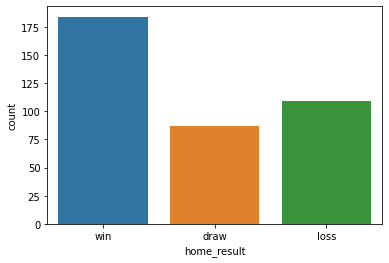

In [63]:
# visualizing the results

sns.countplot(data=epl, x='home_result')

**Highest home possession**

In [64]:
# which home teams recorded the highest possession figures in a game?

epl.sort_values('home_possessions', ascending=False).head()[['home_team',
                                                             'goals_home','away_team','away_goals','home_possessions',
                                                             'away_possessions']]

,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions
72,Liverpool,3,Nottingham Forest,2,81.1,18.9
39,Manchester City,2,Leeds United,1,80.9,19.1
133,Arsenal,3,Bournemouth,2,80.1,19.9
34,Brighton and Hove Albion,1,Everton,5,77.7,22.3
12,Newcastle United,0,Leicester City,0,77.6,22.4


**Highest away possession**

In [65]:
# highest possession figures in  a single game for an away team

epl.sort_values('away_possessions', ascending=False)[:5][['home_team','goals_home','away_team','away_goals','home_possessions',
                                                          'away_possessions']]

,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions
21,Nottingham Forest,1,Arsenal,0,18.3,81.7
372,West Ham United,0,Manchester City,2,24.6,75.4
270,Nottingham Forest,1,Liverpool,0,24.8,75.2
59,Nottingham Forest,3,Brighton and Hove Albion,1,24.8,75.2
165,Crystal Palace,1,Brighton and Hove Albion,1,25.8,74.2


**Most goal attempts by a home team**

In [66]:
# most attempts by a home team in a single game

epl[['home_team','goals_home','away_team','away_goals','home_shots','away_shots']].nlargest(5, 'home_shots')

,home_team,goals_home,away_team,away_goals,home_shots,away_shots
106,Brighton and Hove Albion,3,Brentford,3,33,7
107,Crystal Palace,2,Leicester City,1,31,3
133,Arsenal,3,Bournemouth,2,31,4
86,Manchester United,2,Everton,0,29,15
236,Manchester City,1,Brentford,2,29,10


**Most goal attempts by an away team**

In [67]:
# which away teams took the most shots in a single match?

epl[['home_team','goals_home','away_team','away_goals','home_shots','away_shots']].nlargest(5, 'away_shots')

,home_team,goals_home,away_team,away_goals,home_shots,away_shots
9,Southampton,4,Liverpool,4,15,30
78,Chelsea,1,Brighton and Hove Albion,2,8,26
224,Leeds United,1,Manchester City,3,9,26
286,Southampton,1,West Ham United,1,10,25
47,Leicester City,2,Everton,2,15,23


## Bookings & infringements

In [68]:
# summing up the yellow are red cards shown

epl['total_yellow']=epl['home_yellow']+epl['away_yellow']
epl['total_red']=epl['home_red']+epl['away_red']

In [69]:
epl['total_bookings']=epl['total_yellow']+epl['total_red']

**Total yellow cards shown**

In [70]:
# total cautions for the entire season

np.sum(epl['total_yellow'])

1374

**Yellow cards per match**

In [71]:
# total cautions per match

round(np.sum(epl['total_yellow'])/len(epl),2)

3.62

**Total sending offs**

In [72]:
# how many early showers were taken during the season?

np.sum(epl['total_red'])

30

**Dirtiest clashes**

In [73]:
# in which matches were the most cards brandished?

epl[['home_team','goals_home','away_team','away_goals',
     'total_yellow','total_red','total_bookings']].nlargest(5,'total_bookings')

,home_team,goals_home,away_team,away_goals,total_yellow,total_red,total_bookings
114,Wolverhampton Wanderers,2,Leeds United,4,8,2,10
63,Wolverhampton Wanderers,2,Crystal Palace,0,9,0,9
154,Chelsea,0,Southampton,1,9,0,9
209,Arsenal,0,Newcastle United,0,9,0,9
234,Brighton and Hove Albion,1,Aston Villa,2,9,0,9


**Match with the most fouls**

In [74]:
# which match had the most infringements?

epl['total_fouls']=epl['home_fouls']+epl['away_fouls']

In [75]:
epl.iloc[epl['total_fouls'].idxmax()][['home_team','goals_home','away_team','away_goals','total_fouls','total_bookings']]

home_team             Chelsea
goals_home                  0
away_team         Southampton
away_goals                  1
total_fouls                41
total_bookings              9
Name: 154, dtype: object

## Top six

In [76]:
# listing the top 6 clubs

top_six=['Manchester City','Arsenal','Manchester United','Newcastle United','Liverpool','Brighton and Hove Albion']

# a dataframe of clashes between the best six clubs

top_six_h2h = epl[(epl['home_team'].isin(top_six)) & epl['away_team'].isin(top_six)]

In [77]:
top_six_h2h.sample(5)

,date,clock,stadium,attendance,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,home_pass,away_pass,home_chances,away_chances,home_corners,away_corners,home_offside,away_offside,home_tackles,away_tackles,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,total_goals,goal_difference,home_result,total_yellow,total_red,total_bookings,total_fouls
62,2023-04-26,8:00pm,Etihad Stadium,53482,Manchester City,4,Arsenal,1,51.9,48.1,14,8,9,2,3,3,2,3,85.1,84.7,4,0,1,3,0,1,72.7,40.0,55.6,44.4,1,5,13,13,3,1,0,0,5,3,win,4,0,4,26
287,2022-10-16,4:30pm,Anfield,53286,Liverpool,1,Manchester City,0,36.8,63.2,13,16,2,6,8,4,3,6,76.9,87.7,5,1,5,6,3,0,52.2,70.0,40.0,60.0,6,1,10,7,3,1,0,0,1,1,win,4,0,4,17
353,2022-08-21,4:30pm,"St James' Park, Newcastle",52258,Newcastle United,3,Manchester City,3,31.3,68.7,12,21,6,10,4,4,2,7,67.3,85.7,4,6,5,5,2,1,53.8,55.6,44.4,55.6,7,2,14,7,4,2,0,0,6,0,draw,6,0,6,21
36,2023-05-07,4:30pm,"St James' Park, Newcastle",50267,Newcastle United,0,Arsenal,2,54.3,45.7,12,10,5,6,4,2,3,2,79.7,79.2,2,2,9,4,0,1,50.0,78.3,58.6,41.4,5,5,16,12,2,1,0,0,2,-2,loss,3,0,3,28
131,2023-03-05,4:30pm,Anfield,53001,Liverpool,7,Manchester United,0,59.6,40.4,18,8,8,4,5,3,5,1,78.0,71.0,6,2,4,3,0,4,82.4,66.7,42.9,57.1,4,1,13,14,2,3,0,0,7,7,win,5,0,5,27


In [78]:
# total matches among the top 6

len(top_six_h2h)

30

In [79]:
# top 6 head-to-head

top_six_h2h['home_result'].value_counts()

win     17
draw     7
loss     6
Name: home_result, dtype: int64

Of the 30 clashes, the home side lost on only 6 occassions.

In [80]:
round(100*len(top_six_h2h[top_six_h2h['home_result']=='win'])/len(top_six_h2h),2)

56.67

In [81]:
round(100*len(top_six_h2h[top_six_h2h['home_result']=='loss'])/len(top_six_h2h),2)

20.0

57% of top 6 matchups ended in a home win while the away team won 20% of the time.

In [82]:
# away wins

top_six_h2h[top_six_h2h['home_result']=='loss'][['home_team','goals_home','away_team','away_goals']]

,home_team,goals_home,away_team,away_goals
26,Arsenal,0,Brighton and Hove Albion,3
36,Newcastle United,0,Arsenal,2
158,Newcastle United,0,Liverpool,2
159,Arsenal,1,Manchester City,3
221,Brighton and Hove Albion,2,Arsenal,4
371,Manchester United,1,Brighton and Hove Albion,2


Neither Manchester United nor Newcastle United won an away match against the rest of the top 6. 

Manchester City and Liverpool did not lose at home to the top 6.

In [83]:
# which top 6 clashes ended in a draw or an away win?

top_six_h2h[top_six_h2h['home_result']!='win'][['home_team','goals_home','away_team','away_goals']]

,home_team,goals_home,away_team,away_goals
11,Brighton and Hove Albion,1,Manchester City,1
26,Arsenal,0,Brighton and Hove Albion,3
36,Newcastle United,0,Arsenal,2
85,Liverpool,2,Arsenal,2
158,Newcastle United,0,Liverpool,2
159,Arsenal,1,Manchester City,3
209,Arsenal,0,Newcastle United,0
221,Brighton and Hove Albion,2,Arsenal,4
285,Manchester United,0,Newcastle United,0
310,Liverpool,3,Brighton and Hove Albion,3


Manchester City won all 5 home games against the top 6. Best home record.

In [84]:
# highest scoring top 6 matches

top_six_h2h.sort_values('total_goals', ascending=False).head(5)[['home_team','goals_home',
                                                                 'away_team','away_goals','total_goals']]

,home_team,goals_home,away_team,away_goals,total_goals
304,Manchester City,6,Manchester United,3,9
131,Liverpool,7,Manchester United,0,7
353,Newcastle United,3,Manchester City,3,6
221,Brighton and Hove Albion,2,Arsenal,4,6
310,Liverpool,3,Brighton and Hove Albion,3,6


In [85]:
# biggest home wins

top_six_h2h[['home_team','goals_home','away_team','away_goals','goal_difference']].nlargest(3,columns='goal_difference')

,home_team,goals_home,away_team,away_goals,goal_difference
131,Liverpool,7,Manchester United,0,7
22,Newcastle United,4,Brighton and Hove Albion,1,3
62,Manchester City,4,Arsenal,1,3


In [86]:
# biggest away win

top_six_h2h[['home_team','goals_home','away_team','away_goals','goal_difference']].nsmallest(3,columns='goal_difference')

,home_team,goals_home,away_team,away_goals,goal_difference
26,Arsenal,0,Brighton and Hove Albion,3,-3
36,Newcastle United,0,Arsenal,2,-2
158,Newcastle United,0,Liverpool,2,-2


## Monthly data

In [87]:
# creating a month column

epl['month']=epl['date'].dt.month_name()

In [88]:
# abbreviating the month names

epl['month']=epl['month'].apply(lambda mon:mon[:3])

In [89]:
epl.head()

,date,clock,stadium,attendance,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,home_pass,away_pass,home_chances,away_chances,home_corners,away_corners,home_offside,away_offside,home_tackles,away_tackles,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,total_goals,goal_difference,home_result,total_yellow,total_red,total_bookings,total_fouls,month
0,2023-05-28,4:30pm,Emirates Stadium,60095,Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,14,6,8,0,4,4,2,2,89.0,88.0,3,0,8,4,1,0,82.4,44.4,47.8,52.2,0,3,8,11,0,0,0,0,5,5,win,0,0,0,19,May
1,2023-05-28,4:30pm,Villa Park,42212,Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,12,8,5,4,5,3,2,1,75.3,83.6,4,3,4,3,0,6,42.9,15.4,52.2,47.8,3,3,15,16,4,4,0,0,3,1,win,8,0,8,31,May
2,2023-05-28,4:30pm,Gtech Community Stadium,17120,Brentford,1,Manchester City,0,34.4,65.6,11,17,4,3,4,6,3,8,79.3,89.8,2,1,3,4,3,0,64.7,35.7,50.0,50.0,2,3,12,8,4,0,0,0,1,1,win,4,0,4,20,May
3,2023-05-28,4:30pm,Stamford Bridge,40130,Chelsea,1,Newcastle United,1,64.4,35.6,22,13,5,4,9,5,8,4,88.9,83.3,2,2,10,3,2,1,42.9,42.9,54.5,45.5,3,5,9,11,0,0,0,0,2,0,draw,0,0,0,20,May
4,2023-05-28,4:30pm,Selhurst Park,25198,Crystal Palace,1,Nottingham Forest,1,66.0,34.0,15,7,3,4,8,2,4,1,85.7,69.9,1,0,5,4,2,2,40.0,52.6,58.3,41.7,3,2,9,13,0,2,0,0,2,0,draw,2,0,2,22,May


In [90]:
# dataframe with data grouped based on month

monthly=epl.groupby('month').sum()[['attendance',
                                        'goals_home','away_goals','total_goals','goal_difference','total_bookings']]

In [91]:
monthly=monthly.reset_index()

monthly

,month,attendance,goals_home,away_goals,total_goals,goal_difference,total_bookings
0,Apr,2474476,109,96,205,13,226
1,Aug,1958864,89,53,142,36,183
2,Dec,716599,21,32,53,-11,61
3,Feb,1651302,53,40,93,13,159
4,Jan,1391926,44,35,79,9,141
5,Mar,1230390,59,33,92,26,116
6,May,1997505,81,62,143,19,170
7,Nov,836952,31,35,66,-4,77
8,Oct,2312400,102,53,155,49,196
9,Sep,718649,32,24,56,8,75


In [92]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   month            10 non-null     object
 1   attendance       10 non-null     int64 
 2   goals_home       10 non-null     int64 
 3   away_goals       10 non-null     int64 
 4   total_goals      10 non-null     int64 
 5   goal_difference  10 non-null     int64 
 6   total_bookings   10 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 688.0+ bytes


**Monthly attendance**

<AxesSubplot:xlabel='month', ylabel='attendance'>

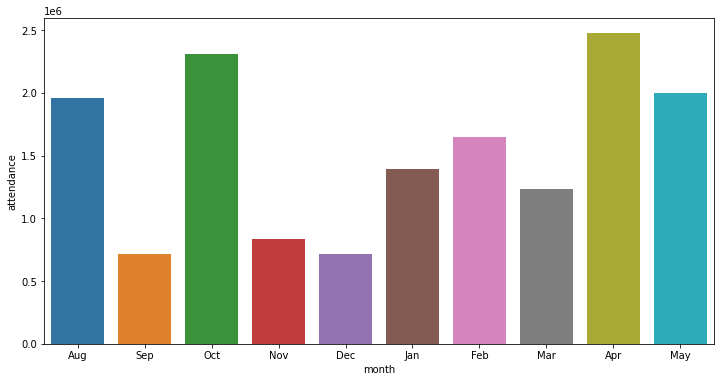

In [93]:
# plotting the monthly attendance figures

plt.figure(figsize=(12,6))
sns.barplot(data=monthly,x='month',y='attendance',order=['Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May'])

November and December had low attendance figures as matches were halted to make way for the FIFA World Cup.

Low figures in September need to be investigated further.

April and May had the most matches ergo the larger crowds. They were also the last two months of the season.

**Monthly goals**

<AxesSubplot:xlabel='month', ylabel='total_goals'>

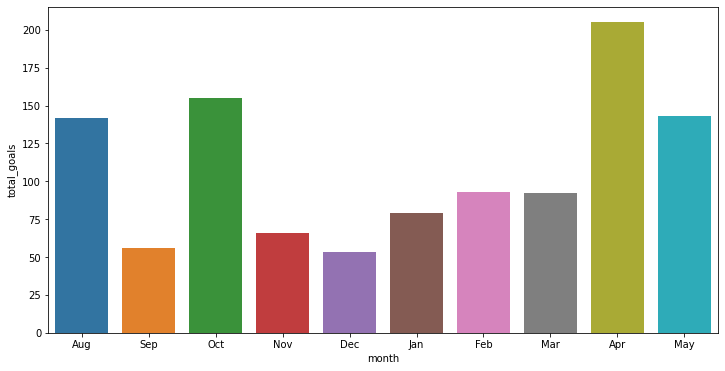

In [94]:
# total goals per month

plt.figure(figsize=(12,6))
sns.barplot(data=monthly, x='month', y='total_goals',order=['Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May'])